In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dfShootings = pd.read_csv('../datasets/shootings.csv')
usPop = pd.read_csv('../datasets/acs2017_census_tract_data.csv')

In [5]:
usPop['Other'] = round(100 - usPop['Hispanic'] - usPop['White'] - usPop['Black'] - usPop['Native'] - usPop['Asian'], 2)
orderedRace = ['White','Black','Hispanic','Asian','Native','Other']

usRacePop = pd.DataFrame(columns = [])
arrayRacePop = []
mortalityPerMillion = []
usTotalPop = usPop['TotalPop'].sum()

for item in orderedRace:
    usRacePop[item + 'Pop'] = round(usPop[item] * usPop['TotalPop'] / 100)
    arrayRacePop.append(round(usRacePop[item+'Pop'].sum() / usTotalPop, 4))
    
arrayRacePop

[0.6081, 0.1216, 0.1847, 0.0524, 0.0065, 0.0268]

In [6]:
dfBlack = dfShootings[dfShootings['race'] == 'Black'].reset_index(drop=True)
blackProp = len(dfBlack) / len(dfShootings)
dfShootings

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,5916,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4891,5925,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4892,5918,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4893,5921,William Slyter,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns


In [5]:
propSample = []
propSample = list(dfShootings['race'].value_counts() / len(dfShootings))
propSample

[0.5058222676200205,
 0.2651685393258427,
 0.1842696629213483,
 0.018998978549540347,
 0.015934627170582225,
 0.009805924412665985]

Text(0, 0.5, 'Grupo')

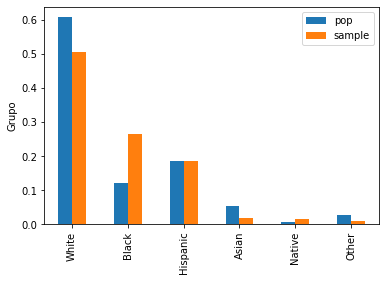

In [6]:
df = pd.DataFrame(index=orderedRace)
df['pop'] = arrayRacePop
df['sample'] = propSample

df.plot.bar()
plt.ylabel('Propopção')
plt.ylabel('Grupo')

In [7]:
def total_variation(p, q):
    return np.sum(np.abs(p - q)) / 2

originalTVD = total_variation(df['pop'], df['sample'])

In [26]:
def sample_proportion(pop_size, prop, n=10000):
    grupo = pop_size * prop
    resultados = np.zeros(n)
    for i in range(n):
        sample = np.random.randint(0, pop_size, 100)
        resultados[i] = np.sum(sample < grupo)
    return resultados

In [27]:
N = len(dfShootings)

p = df.loc[g]['pop']
sample_proportion(N, p) / 100

array([0.01, 0.01, 0.04, ..., 0.02, 0.03, 0.03])

In [28]:
N = len(dfShootings)

A = np.zeros(shape=(10000, len(df.index)))
for i, g in enumerate(df.index):
    p = df.loc[g]['pop']
    print(g)
    A[:, i] = sample_proportion(N, p) / 100

White
Black
Hispanic
Asian
Native
Other


In [29]:
all_distances = []
for i in range(A.shape[0]):
    all_distances.append(total_variation(df['pop'], A[i]))

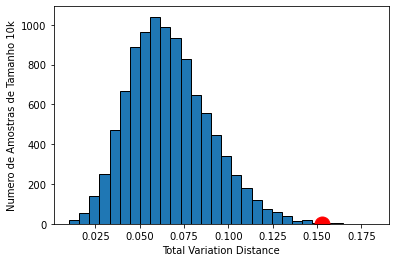

In [30]:
plt.hist(all_distances, bins=30, edgecolor='k')
plt.ylabel('Numero de Amostras de Tamanho 10k')
plt.xlabel('Total Variation Distance')
plt.plot(originalTVD, [0], 'ro', ms=15)

In [31]:
inferior, superior = np.percentile(all_distances, 2.5), np.percentile(all_distances, 97.5)
superior

0.11664999999999996

In [ ]:
#Questao B:

In [4]:
df_death_per_state = dfShootings.groupby(['state']).size()
dps = pd.DataFrame(df_death_per_state)
dps = dps.rename(columns = {0: 'Deaths'})
dps['APP'] = 0
dps.loc[['AK','AR','ID','WV','WY','MT','NM','AL','ND','HI','LA','SC','MS','KY','TN','NV','MN','TX','SD','WI','CO','IA','IN','FL','AZ'],'APP'] = 1
dps = dps.groupby(['APP']).sum()

usPop = usPop.groupby(['State']).sum()
usPop = usPop[['TotalPop']]
usPop['APP'] = 0
usPop.loc[['Alaska','Arkansas','Idaho','West Virginia','Wyoming','Montana','New Mexico','Alabama','North Dakota','Hawaii','Louisiana','South Carolina','Mississippi','Kentucky','Tennessee','Nevada','Minnesota','Texas','South Dakota','Wisconsin','Colorado','Iowa','Indiana','Florida','Arizona'],'APP'] = 1
usPop = usPop.groupby(['APP']).sum()

dps['Pop'] = usPop['TotalPop']
dps['DPM'] = (dps['Deaths']/dps['Pop'])*1000000
dps

,Deaths,Pop,DPM
APP,,,
0,2469,198307811,12.450342
1,2426,126165559,19.228703
